In [2]:
#------------------------------------------------------------------------пункт 1
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import os
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target
df['name'] = df['target'].map(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


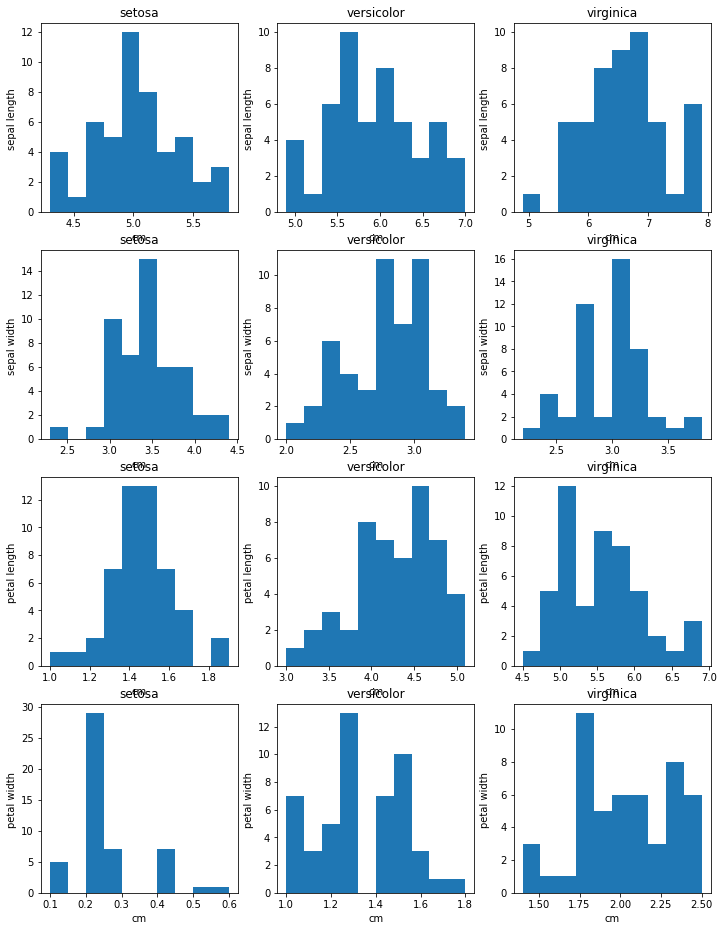

In [3]:
plt.figure(figsize = (12, 16))
plot_number = 0
for feature_name in iris['feature_names']:   # создаём 12 плотов  
    for target_name in iris['target_names']: # 1 плот показывает, сколько элементов какой длины есть у каждого типа 
        plot_number += 1                     # всего 3 типа цветков, для каждого по 4 параметра (sepal length, и т.д.)
        plt.subplot(4, 3, plot_number)    # 1 столбец в гистограмме - кол-во строк в таблице с параметром определённого значения в см для данного цветка
        plt.hist(df.loc[df['name'] == target_name,feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])

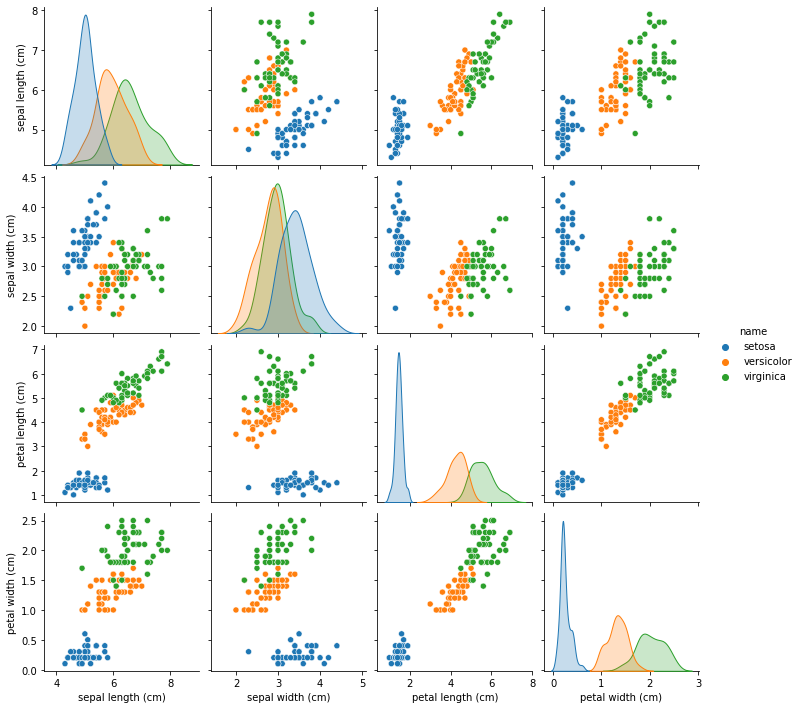

In [4]:
sns.pairplot(df.iloc[:,[0,1,2,3,5]], hue = 'name')
# df.iloc[:,[0,1,2,3,5]] - вырезает 'target' столбец 
# hue = 'name' - на основании значений из какого столбца нужно разделять данные
# seaborn.pairplot - рисует 16 графиков, на которых разными цветами представлены 
# соответственно значению из столбца 'name'.
# Из документации: Plot pairwise relationships in a dataset - Построение попарных взаимосвязей в наборе данных
# на главной диагонали - распределения признака

In [5]:
df.iloc[:,:4].corr() # df.iloc[:,:4] - убирает все столбцы, начиная с 5-ого, т.е. убирает target и name
# .corr() # посчитать корреляцию между между всеми параметрами.
#  Так как не указан класс ирисов, будет посчитана корреляция по всей таблице

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [6]:
df.iloc[:,:4].cov() # по аналогии с предыдущим блоком кода, считает ковариацию между признаками по всей таблице

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [7]:
df.iloc[:,[0,1,2,3,5]].groupby('name').corr() # df.iloc[:,[0,1,2,3,5]] - убрать столбец target
# .groupby('name') - сгруппировать данные по значениям из столбца name
# .corr() - посчитать корреляцию между всеми признаками попарно, но уже в группах,
# т.е. для 1 класса ириса будет посчитана корреляция между только его значениями признаков

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

In [8]:
df.iloc[:,[0,1,2,3,5]].groupby('name').mean() # убрать столбец target, посчитать
# среднее значение каждого признака, признаки сгруппированны по названию ириса

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
name,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


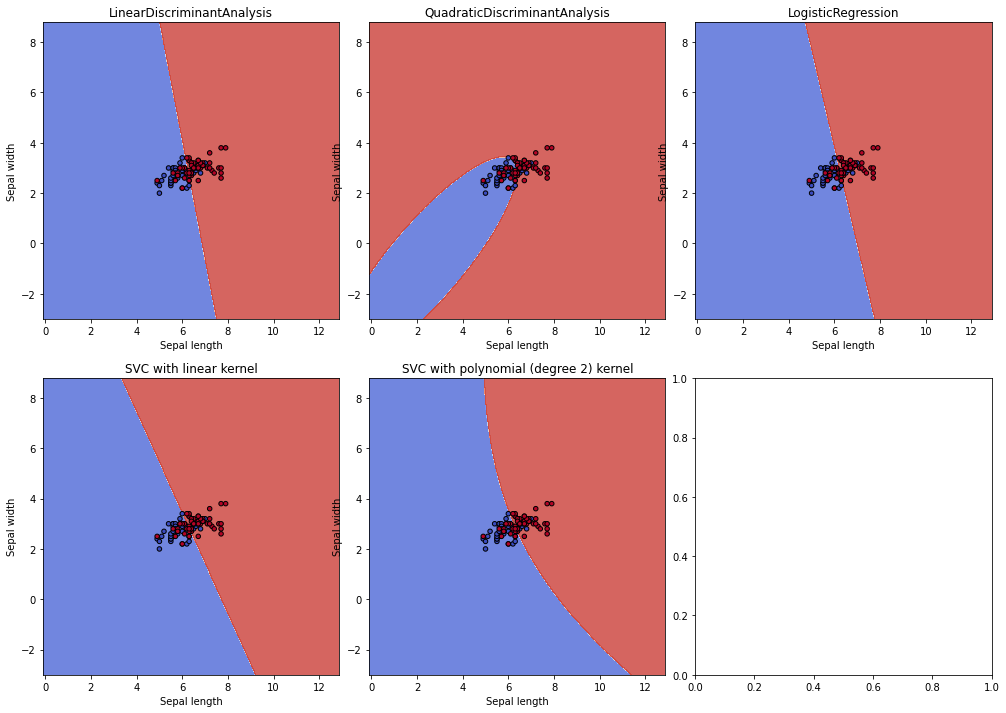

In [9]:
#------------------------------------------------------------------------пункт 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns

def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True),
          LogisticRegression(random_state=0),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          ]
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = [
          'LinearDiscriminantAnalysis',
          'QuadraticDiscriminantAnalysis',
          'LogisticRegression',
          'SVC with linear kernel',
          'SVC with polynomial (degree 2) kernel',
          ]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [10]:
#------------------------------------------------------------------------пункт 3

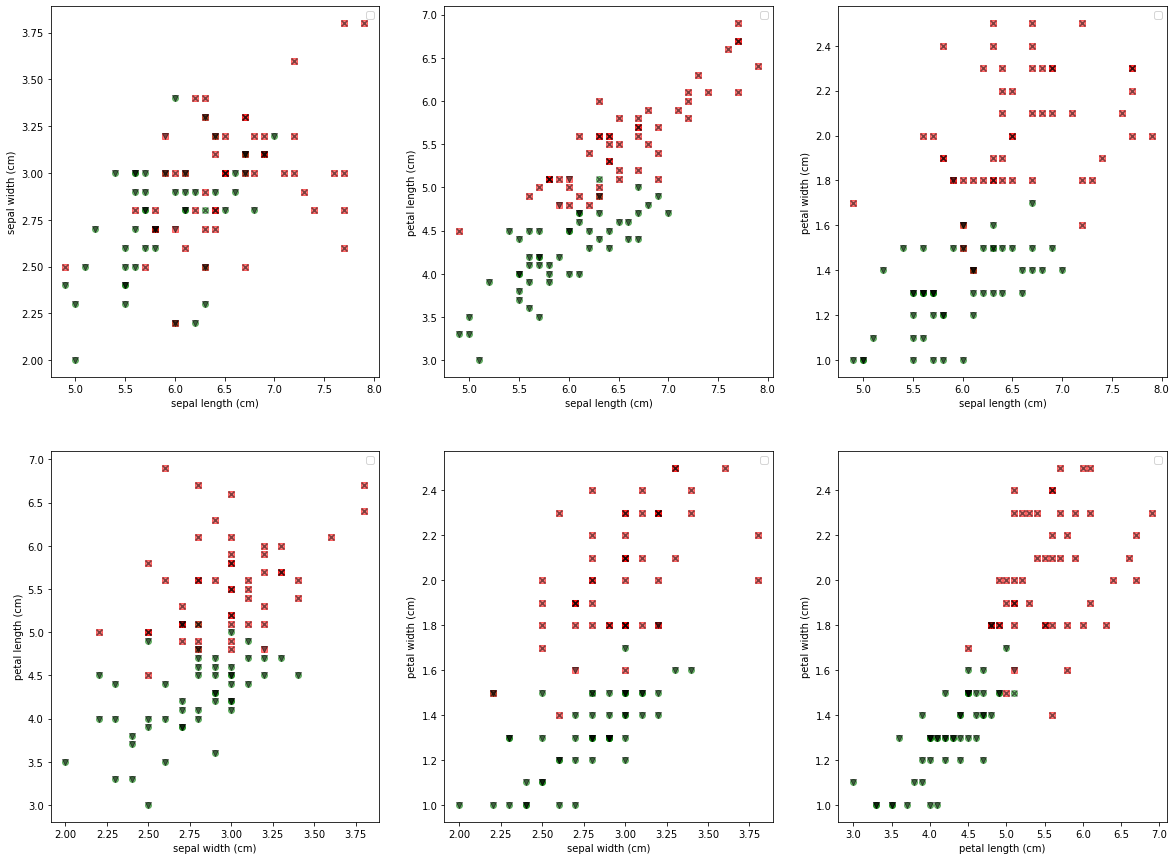

In [56]:
import pandas as pd
from itertools import *  # combinations
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

iris_frame = pd.DataFrame(iris.data,columns = iris.feature_names)

X = iris.data[iris.target!=0]
y = iris.target[iris.target!=0]

LDAModel = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
LDAModel.fit(X,y)
pred = LDAModel.predict(X)

plt.figure(figsize=(20, 15))

for i, cols in enumerate(combinations(list(range(4)), 2)):
    plt.subplot(231+i)
    

    versicolor_predict = {
                      'x': X[pred == 1, cols[0]], 'y': X[pred== 1, cols[1]],
                      'c': 'green', 'marker': 'o' , 'alpha': 0.5,
                      }
    virginica_predict = {
                      'x': X[pred == 2, cols[0]], 'y': X[pred== 2, cols[1]],
                      'c': 'red', 'marker': 's' , 'alpha': 0.5,
                      }
    versicolor_target = {
                      'x': X[y == 1, cols[0]], 'y': X[y == 1, cols[1]],
                      'c': 'black', 'marker': 'v' , 'alpha': 0.5,
                      }
    virginica_target = {
                      'x': X[y == 2, cols[0]], 'y': X[y == 2, cols[1]],
                      'c': 'black','marker': 'x' , 'alpha': 0.5,
                      }   
                      
    plt.legend(
        ['versicolor predict', 'virginica predict', 
                'versicolor target', 'virginica target']
               )                                         
    plt.scatter(**versicolor_predict)
    plt.scatter(**virginica_predict)
    plt.scatter(**versicolor_target)
    plt.scatter(**virginica_target)
    plt.xlabel(list(iris_frame.columns)[cols[0]])
    plt.ylabel(list(iris_frame.columns)[cols[1]])

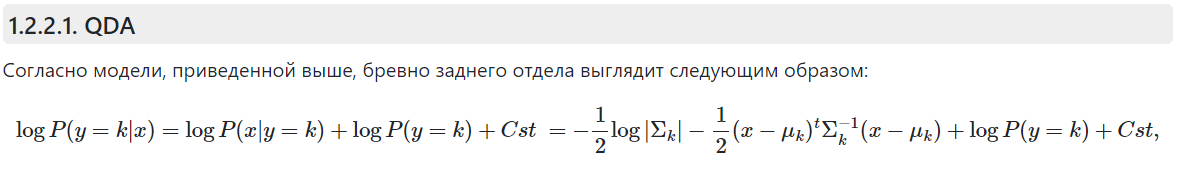

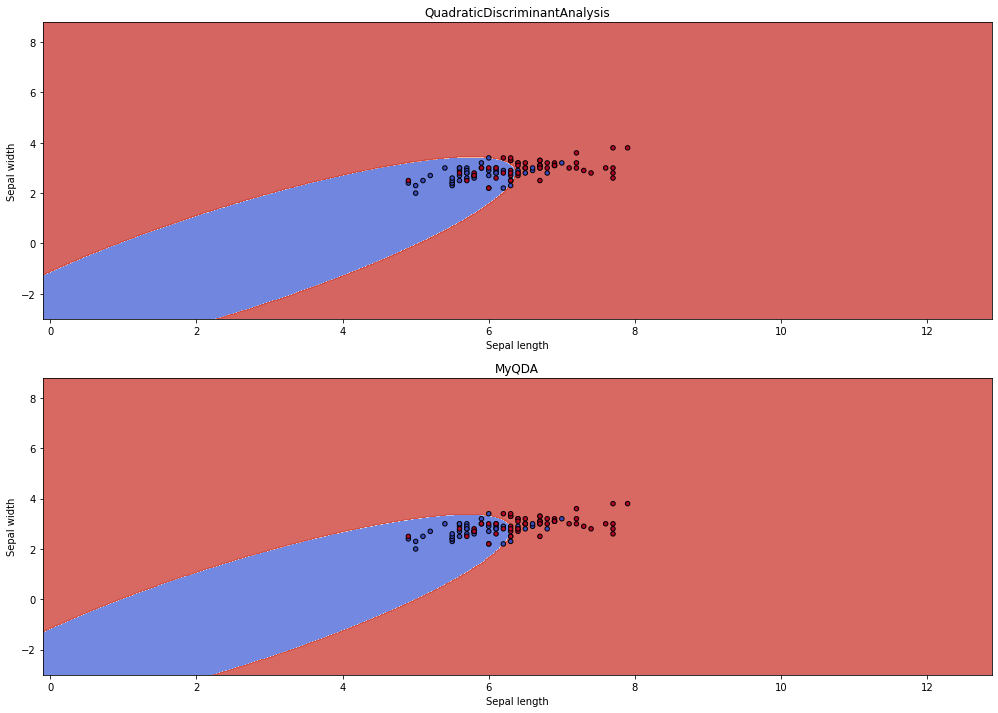

In [ ]:
# Пункт 4

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns


class QDAModel:
  def __init__(self):
    self._covs = None
    self._means = None
    self._probs = None
    self._res = None
    

  def get_result(self):
    return self._res

  def fit(self, x, y):
    x1 = np.array(x)[y==1]
    x2 = np.array(x)[y!=1]
    self._covs = np.array([np.cov(x1.T), np.cov(x2.T)])
    self._means = np.array([x1.mean(axis=0), x2.mean(axis=0)])
    total = x1.shape[0] + x2.shape[0]
    self._probs = np.array([x1.shape[0] / total, x2.shape[0] / total])
    return self

  def predict(self, x):
    Ps = []
    dets = []
    invs = []
    for mat in self._covs:
      invs.append(np.linalg.inv(mat))
      dets.append(np.linalg.det(mat))
    dets = np.array(dets)
    invs = np.array(invs)
    len = dets.shape[0]
    for i in range(0, len):
      Ps.append(-1/2 * np.log(dets[i]) - np.sum(((x - self._means[i]) @ invs[i] * (x - self._means[i])), axis=1) + np.log(self._probs[i]))
    #Ps.append(-1/2 * np.log(DET1) - np.sum(((X1 - m1) @ A1 * (X1 - m1)), axis=1) + np.log(PROB1))
    Ps = np.array(Ps)
    self._res = np.argmax(Ps.T, axis=1)
    return self._res

iris = datasets.load_iris()
X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

model = QDAModel()
model.fit(X, y)
res = model.predict(X)


def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [
          QuadraticDiscriminantAnalysis(store_covariance=True),
          QDAModel(),
          ]

models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = [
          'QuadraticDiscriminantAnalysis',
          'MyQDA',
          ]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 1,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

plt.show()